# Dependencies

In [25]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

%matplotlib inline
sns.set(style="white")
warnings.filterwarnings("ignore")

# Load data

In [26]:
data_1 = pd.read_csv('../data/dr_data_1/train.csv')
data_1 = data_1.loc[:, ~data_1.columns.str.contains('Unnamed')]

data_2 = pd.read_csv('../data/dr_data_2/train.csv')
data_2 = data_2.loc[:, ~data_2.columns.str.contains('Unnamed')]

test = pd.read_csv('../data/dr_test/test.csv')
test = test.loc[:, ~test.columns.str.contains('Unnamed')]

data_1['data'] = '1'
data_2['data'] = '2'

data_1["id_code"] = data_1["id_code"].apply(lambda x: x + ".png")
data_2["id_code"] = data_2["id_code"].apply(lambda x: x + ".jpeg")
test["id_code"] = test["id_code"].apply(lambda x: x + ".jpeg")

test.to_csv("../output/test.csv")
diag_0 = data_2[data_2['diagnosis'] == 0].sample(frac=0.3, random_state=seed)
diag_oth = data_2[data_2['diagnosis'] != 0]
data_2 = diag_0.append(diag_oth)
train_df = data_2.append(data_1)
display(train_df.head())


,id_code,diagnosis,data
24535,35033_right.jpeg,0,2
9336,15641_left.jpeg,0,2
15923,24059_right.jpeg,0,2
28210,39610_left.jpeg,0,2
3690,8578_left.jpeg,0,2


# 5-Fold split

In [27]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for fold_n, (train_index, val_index) in enumerate(folds.split(data_1, data_1['diagnosis'])):
    print('Fold: %s, Train size: %s, Validation size %s' % 
          (fold_n, len(train_index), len(val_index)))
    data_1[('fold_%s' % fold_n)] = 0
    data_1[('fold_%s' % fold_n)].loc[train_index] = 'train'
    data_1[('fold_%s' % fold_n)].loc[val_index] = 'validation'
    data_2[('fold_%s' % fold_n)] = 0
    data_2[('fold_%s' % fold_n)] = 'train'
    
train_df = data_2.append(data_1)
display(train_df.head())

Fold: 0, Train size: 2929, Validation size 733
Fold: 1, Train size: 2929, Validation size 733
Fold: 2, Train size: 2930, Validation size 732
Fold: 3, Train size: 2930, Validation size 732
Fold: 4, Train size: 2930, Validation size 732


,id_code,diagnosis,data,fold_0,fold_1,fold_2,fold_3,fold_4
24535,35033_right.jpeg,0,2,train,train,train,train,train
9336,15641_left.jpeg,0,2,train,train,train,train,train
15923,24059_right.jpeg,0,2,train,train,train,train,train
28210,39610_left.jpeg,0,2,train,train,train,train,train
3690,8578_left.jpeg,0,2,train,train,train,train,train


# Train & Validation label distribution

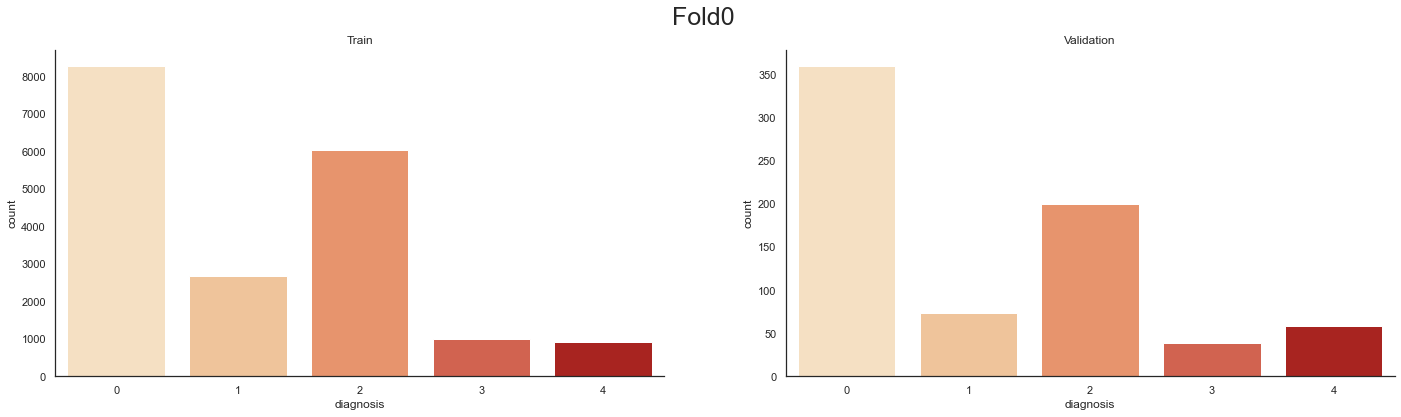

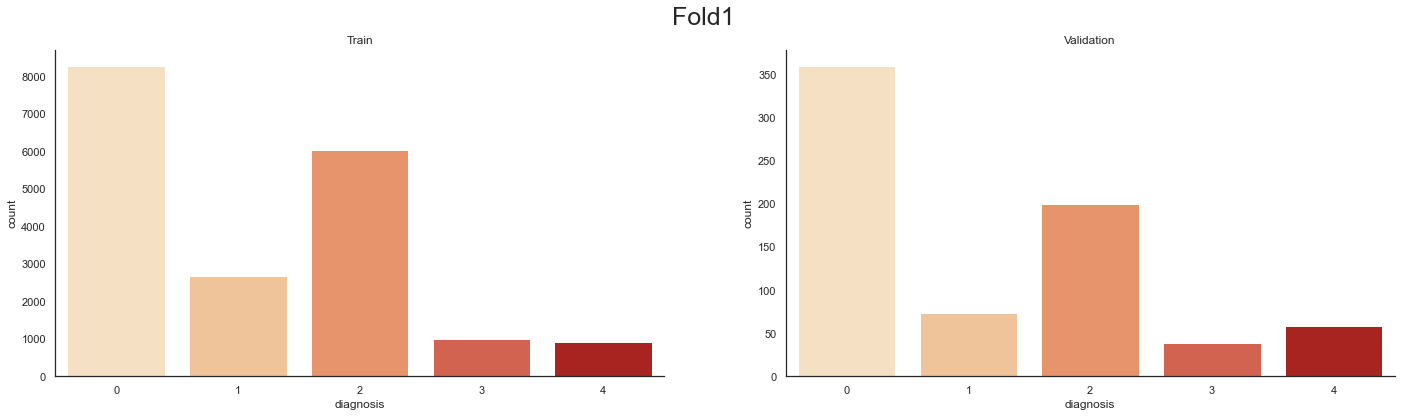

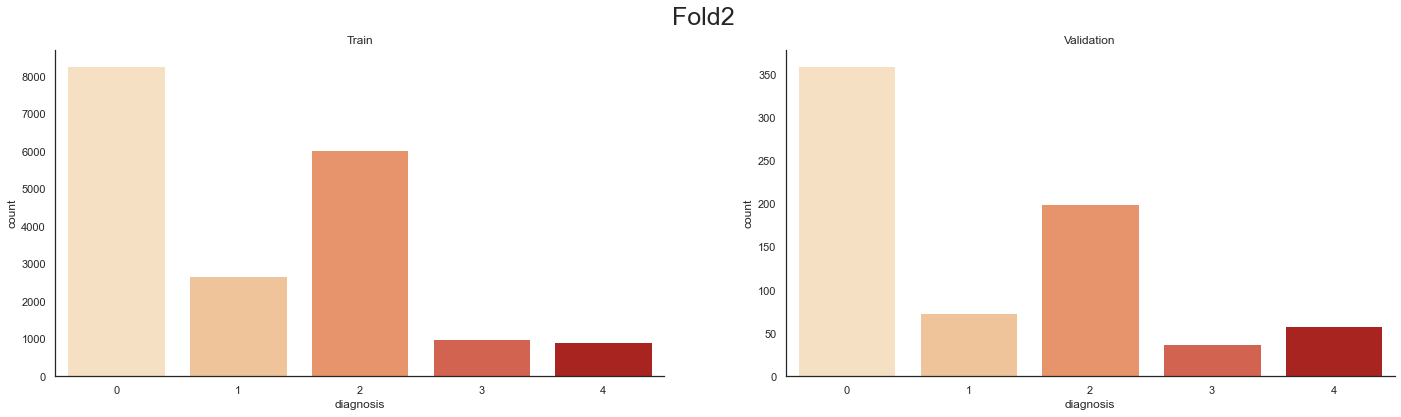

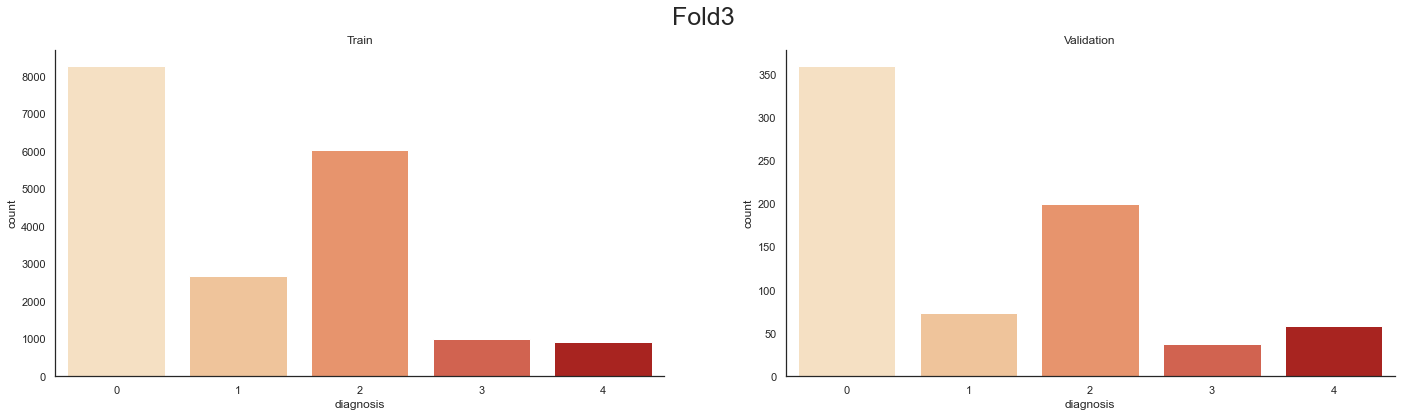

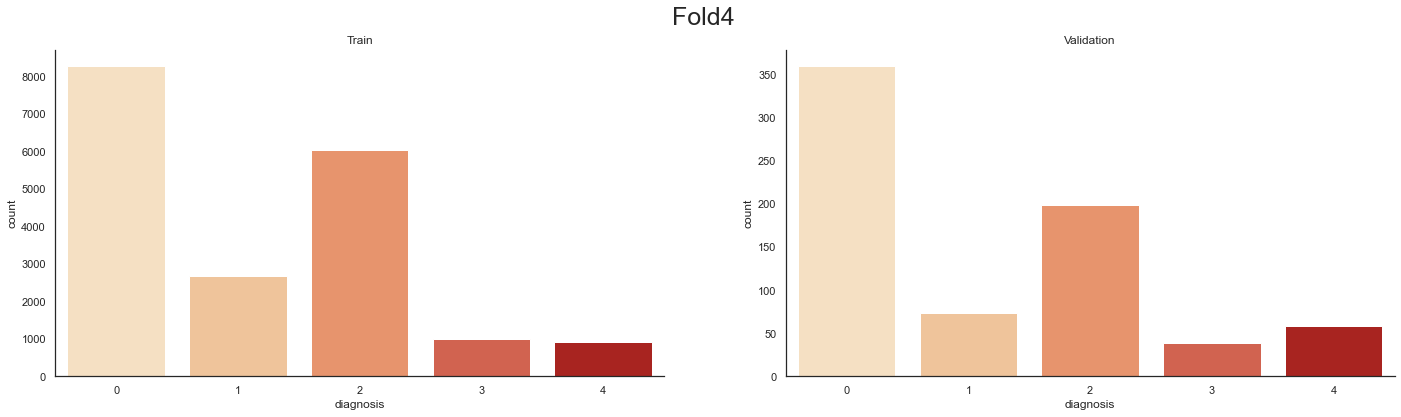

In [28]:
for fold_n, (train_index, val_index) in enumerate(folds.split(train_df, train_df['diagnosis'])):
    fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 6))
    fig.suptitle('Fold%s'%fold_n, fontsize=25)    
    sns.countplot(x="diagnosis", data=train_df[train_df[('fold_%s' % fold_n)] == 'train'], palette="OrRd", ax=ax1).set_title('Train')
    sns.countplot(x="diagnosis", data=train_df[train_df[('fold_%s' % fold_n)] == 'validation'], palette="OrRd", ax=ax2).set_title('Validation')
    sns.despine()
    plt.show()

# Output 5-fold set

In [29]:
train_df = train_df.loc[:, ~train_df.columns.str.contains('level_0')]
train_df = train_df.loc[:, ~train_df.columns.str.contains('index')]
train_df.to_csv('../output/data_5_fold.csv', index=False)
print('Number of train samples: ', train_df[train_df[('fold_%s' % fold_n)] == 'train'].shape[0])
print('Number of validation samples: ', train_df[train_df[('fold_%s' % fold_n)] == 'validation'].shape[0])
display(train_df.head())

Number of train samples:  18949
Number of validation samples:  732


,id_code,diagnosis,data,fold_0,fold_1,fold_2,fold_3,fold_4
24535,35033_right.jpeg,0,2,train,train,train,train,train
9336,15641_left.jpeg,0,2,train,train,train,train,train
15923,24059_right.jpeg,0,2,train,train,train,train,train
28210,39610_left.jpeg,0,2,train,train,train,train,train
3690,8578_left.jpeg,0,2,train,train,train,train,train
